# 逻辑回归

## 主要内容
* 数学原理 - Sigmoid函数
* 二分类代码演示
* 多分类代码演示
* 实战 - 某电商用户流失预测

## 1.数学原理 - Sigmoid函数

In [1]:
from sklearn.linear_model import LogisticRegression

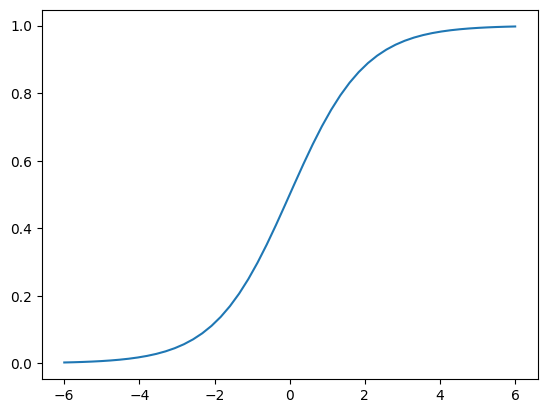

In [2]:
# 补充知识点：Sigmoid函数绘制
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(-6, 6)  # 通过linspace()函数生成-6到6的等差数列，默认50个数
y = 1.0 / (1.0 + np.exp(-x))  # Sigmoid函数计算公式，exp()函数表示指数函数

plt.plot(x,y)  # 画图
plt.show()  # 展示

In [3]:
# 演示下linespace()函数
import numpy as np
x = np.linspace(-6, 6)
x

array([-6.        , -5.75510204, -5.51020408, -5.26530612, -5.02040816,
       -4.7755102 , -4.53061224, -4.28571429, -4.04081633, -3.79591837,
       -3.55102041, -3.30612245, -3.06122449, -2.81632653, -2.57142857,
       -2.32653061, -2.08163265, -1.83673469, -1.59183673, -1.34693878,
       -1.10204082, -0.85714286, -0.6122449 , -0.36734694, -0.12244898,
        0.12244898,  0.36734694,  0.6122449 ,  0.85714286,  1.10204082,
        1.34693878,  1.59183673,  1.83673469,  2.08163265,  2.32653061,
        2.57142857,  2.81632653,  3.06122449,  3.30612245,  3.55102041,
        3.79591837,  4.04081633,  4.28571429,  4.53061224,  4.7755102 ,
        5.02040816,  5.26530612,  5.51020408,  5.75510204,  6.        ])

In [4]:
# 演示下np.exp()函数
x = -1 
np.exp(-x)

2.718281828459045

## 2.二分类代码演示

In [5]:
# 模型训练
from sklearn.linear_model import LogisticRegression

# 构造数据
X = [[1, 0], [5, 1], [6, 4], [4, 2], [3, 2]]
y = [0, 1, 1, 0, 0]


model = LogisticRegression()
model.fit(X, y)  # 如果运行时下面出现FutureWarning警告，不要在意，它只是在告诉你以后模型的官方默认参数会有所调整而已，不是报错

LogisticRegression()

In [6]:
# 如果不想看到FutureWarning这样的警告信息，可以在代码最上面加上如下内容
# import warnings
# warnings.filterwarnings('ignore')

In [7]:
# 模型预测 - 预测单个数据
print(model.predict([[2,2]]))

[0]


In [8]:
# 模型预测 - 预测多个数据1
print(model.predict([[1,1], [2,2], [5, 5]]))

[0 0 1]


In [9]:
# 模型预测 - 预测多个数据2
print(model.predict([[1, 0], [5, 1], [6, 4], [4, 2], [3, 2]]))  # 因为这里演示的多个数据和X是一样的，所以也可以直接写成model.predict(X)

[0 1 1 0 0]


In [10]:
print(model.predict(X))  # 因为这里演示的多个数据和X是一样的，所以也可以直接写成model.predict(X)

[0 1 1 0 0]


## 2.代码演示

In [11]:
# 预测概率：左列是分类为0的概率，右列是分类为1的概率
y_pred_proba = model.predict_proba(X)
y_pred_proba  # 直接打印

array([[0.97344854, 0.02655146],
       [0.39071972, 0.60928028],
       [0.17991028, 0.82008972],
       [0.63167893, 0.36832107],
       [0.82424527, 0.17575473]])

In [13]:
# 另外一种打印概率的方式：通过DataFrame展示，更加好看些
import pandas as pd
a = pd.DataFrame(y_pred_proba, columns=['分类为0的概率', '分类为1的概率'])  # 2.2.1 通过numpy数组创建DataFrame
a

,分类为0的概率,分类为1的概率
0,0.973449,0.026551
1,0.390720,0.609280
2,0.179910,0.820090
3,0.631679,0.368321
4,0.824245,0.175755


In [14]:
# 打印系数和截距项
print(model.coef_)  # 系数k1与k2
print(model.intercept_)  # 截距项k0

[[1.00595248 0.02223835]]
[-4.60771284]


In [15]:
model.coef_.T

array([[1.00595248],
       [0.02223835]])

In [16]:
# 如果想批量查看预测概率
import numpy as np
for i in range(5):  # 这里共有5条数据，所以循环5次
    print(1 / (1 + np.exp(-(np.dot(X[i], model.coef_.T) + model.intercept_))))

[0.02655146]
[0.60928028]
[0.82008972]
[0.36832107]
[0.17575473]


## 3.多分类代码演示

In [17]:
# 构造数据，此时y有多个分类
X = [[1, 0], [5, 1], [6, 4], [4, 2], [3, 2]]
y = [-1, 0, 1, 1, 1]  # 这里有三个分类-1、0、1

# 模型训练
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)  # 如果运行时下面出现FutureWarning警告，不要在意，它只是在告诉你以后模型的官方默认参数会有所调整而已，不是报错

LogisticRegression()

In [18]:
print(model.predict([[0, 0]]))

[-1]


In [19]:
model.predict(X)

array([-1,  0,  1,  1,  1])

In [20]:
print(model.predict_proba([[0, 0]]))

[[0.88352311 0.02340026 0.09307662]]


## 4.实战 - 某电商用户流失预测

In [39]:
# 1.读取数据
import pandas as pd
df = pd.read_csv("./dataset/某电商用户流失预测.csv")
df.head()

,总流水（元）,最后一次下单距今时间（天）,上月流水（元）,注册时长（年）,是否流失
0,48521.0,169,322.00,0,0
1,48552.5,172,395.75,0,1
2,48597.5,171,363.75,0,0
3,48629.0,173,319.75,0,0
4,48665.0,172,345.25,0,1


In [40]:
# 2.划分特征变量和目标变量
X = df.drop(columns='是否流失') 
y = df['是否流失']   

In [41]:
X

,总流水（元）,最后一次下单距今时间（天）,上月流水（元）,注册时长（年）
0,48521.0,169,322.00,0
1,48552.5,172,395.75,0
2,48597.5,171,363.75,0
3,48629.0,173,319.75,0
4,48665.0,172,345.25,0
...,...,...,...,...
3093,259179.5,29,349.75,2
3094,259256.0,29,360.50,2
3095,259292.0,29,375.50,2
3096,259346.0,29,472.50,2


In [42]:
y

0       0
1       1
2       0
3       0
4       1
       ..
3093    0
3094    0
3095    0
3096    1
3097    0
Name: 是否流失, Length: 3098, dtype: int64

In [43]:
# 3.划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 设置random_state使得每次划分的数据一样

X_train.head()  # 显示训练集X_train的前5行，在别的代码编辑器里需要通过print()函数打印查看
# y_train.head()  # 显示训练集y_train的前5行，在别的代码编辑器里需要通过print()函数打印查看
# X_test.head()  # 显示测试集X_test的前5行，在别的代码编辑器里需要通过print()函数打印查看
# y_test.head()  # 显示测试集y_test的前5行，在别的代码编辑器里需要通过print()函数打印查看

,总流水（元）,最后一次下单距今时间（天）,上月流水（元）,注册时长（年）
1026,92976.5,99,150.50,2
1721,131460.5,66,498.50,0
2436,181113.5,45,125.75,5
3026,250409.0,30,284.50,3
1735,132401.0,64,402.75,1


In [44]:
# 4.模型搭建
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(X_test)
print(y_pred[0:100])  

[0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0]


In [47]:
# 放到一个DataFrame里进行查看比对
a = pd.DataFrame()  # 创建一个空DataFrame 
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a # 可以看到此时前5个预测准确度为80%

,预测值,实际值
0,0,0
1,0,0
2,1,0
3,0,1
4,0,1
...,...,...
615,0,1
616,0,0
617,1,1
618,0,0


In [48]:
import numpy as np
np.sum(np.array(y_pred) == np.array(y_test)) / len(y_test)

0.7903225806451613

In [31]:
# 查看全部的预测准确度
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.7903225806451613


In [32]:
# 另外一种查看模型预测准确度的方法
model.score(X_test, y_test)

0.7903225806451613

In [33]:
# 6.模型使用2 - 预测概率
y_pred_proba = model.predict_proba(X_test)  
y_pred_proba[0:5]

array([[0.94341849, 0.05658151],
       [0.8899417 , 0.1100583 ],
       [0.20793664, 0.79206336],
       [0.91126034, 0.08873966],
       [0.68640686, 0.31359314]])

In [34]:
# 另一种查看概率的方式
a = pd.DataFrame(y_pred_proba, columns=['不流失概率', '流失概率'])
a.head()

,不流失概率,流失概率
0,0.943418,0.056582
1,0.889942,0.110058
2,0.207937,0.792063
3,0.911260,0.088740
4,0.686407,0.313593


In [35]:
# 只查看流失的概率（也即y=1概率，即上面二维数组的第二列）
y_pred_proba[:,1]

array([0.05658151, 0.1100583 , 0.79206336, 0.08873966, 0.31359314,
       0.04731267, 0.7350078 , 0.11560317, 0.08909589, 0.1815316 ,
       0.68542361, 0.14642302, 0.27662189, 0.47392146, 0.30736011,
       0.04612046, 0.23050912, 0.38308283, 0.07440281, 0.0614589 ,
       0.77556158, 0.14761968, 0.05915951, 0.09671951, 0.68524495,
       0.47898385, 0.58726591, 0.58170565, 0.40314252, 0.19731102,
       0.1187845 , 0.20732289, 0.04988999, 0.05734262, 0.16961969,
       0.25625205, 0.49808631, 0.170452  , 0.0466363 , 0.42477545,
       0.05788769, 0.10595073, 0.37088026, 0.1152662 , 0.03859624,
       0.35537183, 0.11274129, 0.41742295, 0.45509088, 0.11084716,
       0.71713026, 0.27474671, 0.03372118, 0.0337828 , 0.07338519,
       0.56700918, 0.58066348, 0.0534608 , 0.4457838 , 0.74814992,
       0.36343782, 0.1379317 , 0.05947551, 0.04636362, 0.08455705,
       0.22377514, 0.47711778, 0.05149043, 0.05764654, 0.36932813,
       0.03844825, 0.05891066, 0.30852714, 0.04741868, 0.31345

In [36]:
# 7.查看各个特征变量的系数（额外知识点，供参考）
model.coef_

array([[-2.06445347e-05, -1.94064381e-02,  1.03074675e-02,
        -2.60977305e-04]])

In [37]:
model.intercept_

array([-0.00011654])

In [38]:
# 通过公式获取流失概率
import numpy as np
for i in range(5):  # 这里演示前5条测试集数据的预测流失的概率
    print(1 / (1 + np.exp(-(np.dot(X_test.iloc[i], model.coef_.T) + model.intercept_))))

[0.05658151]
[0.1100583]
[0.79206336]
[0.08873966]
[0.31359314]
